In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'0111': 276, '0001': 266, '0100': 249, '1101': 233}


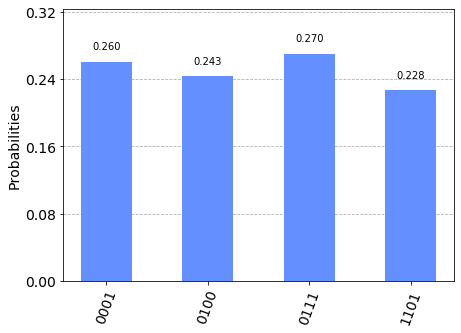

In [12]:
qx = QuantumRegister(3)
qy = QuantumRegister(4)
c = ClassicalRegister(4, "c")
qc = QuantumCircuit(qx, qy, c, name="oracle2")

# truth table
# x   - y
# 000 - 0001
# 001 - 0111
# 010 - 0100
# 011 - 1101
# 100 - 0001
# 101 - 0111
# 110 - 0100
# 111 - 1011

qc.h(qx)

# x=000 - y=0001
qc.x(qy[0])

# x=001 - y=0111, se qy[2] for 0, substitui por qx[1] se ele for igual a 1, 
# como ele esta superposto acontence os dois casos
qc.cx(qx[1], qy[2])
qc.cx(qx[1], qy[1])

# x=010 - y=0100
qc.cx(qx[2], qy[2])
qc.cx(qx[2], qy[0])

# x=011 - y=1101
qc.ccx(qx[2], qx[1], qy[3])

# repeat
qc.ccx(qx[2], qx[1], qy[2])
qc.ccx(qx[2], qx[1], qy[1])
qc.ccx(qx[2], qx[1], qy[0])

qc.measure(qy, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

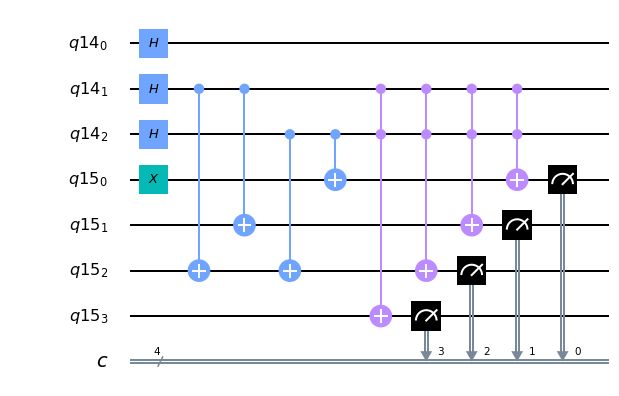

In [13]:
qc.draw(output='mpl', plot_barriers=False)

In [14]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [57]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [8]:
#api.get_last_codes()

In [33]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q18[4];
qreg q19[1];
creg c[4];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
x q19[0];
h q19[0];
cx q18[0],q19[0];
cx q18[2],q19[0];
cx q18[3],q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
h q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
measure q18[0] -> c[0];
measure q18[1] -> c[1];
measure q18[2] -> c[2];
measure q18[3] -> c[3];

